## LOAD DATASET

- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

pd.options.display.max_rows = 150
pd.options.display.max_columns = 50

In [87]:
df= pd.read_csv('Data/hotel_bookings_data.csv')
print(df.shape) # Melihat ukuran baris dan kolom dari suatu dataframe
df.sample(5)

(119390, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5153,Resort Hotel,0,172,2018,June,17,18,3,5,1,0.0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,115.0,NaN,0,Family,48.8,0,1,Check-Out
13675,Resort Hotel,1,17,2019,October,34,26,1,1,2,0.0,0,Breakfast,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,240.0,0,2,Canceled
45524,City Hotel,0,100,2017,December,44,31,1,1,1,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,1.0,NaN,0,Family,0.0,0,0,Check-Out
61688,City Hotel,1,61,2018,February,52,22,2,3,2,0.0,0,No Meal,Kabupaten Garut,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,NaN,0,Personal,74.8,0,1,Canceled
74533,City Hotel,1,332,2017,November,38,14,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,NaN,0,Contract,62.0,0,0,Canceled


## EXPLORATORY DATA ANALYSIS

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [89]:
# Pisahkan data berdasarkan tipe data kategori dan numerik
cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status']
nums = ['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

In [90]:
## Periksa jumlah missing value
for a in df:
    missing_value = (df[a].isna().sum())
    mv_percentage = round((df[a].isna().sum()/df.shape[0])*100, 2)
    total_mv = df.isna().any(axis = 1).sum()*100/df.shape[0]
    if missing_value == 0:
        pass
    else:
        print(f'Jumlah missing value {a} {missing_value} ({mv_percentage}%)')

Jumlah missing value children 4 (0.0%)
Jumlah missing value city 488 (0.41%)
Jumlah missing value agent 16340 (13.69%)
Jumlah missing value company 112593 (94.31%)


Terlalu banyak missing value di kolom `company`, sehingga kolom tersebut akan dihapus

## PREPROCESSING

### Missing Value

In [91]:
# Hapus kolom 'company'
df = df.drop(columns='company', axis=1)

# Handle missing values
df['children']= df['children'].fillna(0)
df['city']= df['city'].fillna('Unknown')
df['agent']= df['agent'].fillna(0)

## Periksa apakah masih terdapat missing value?
df.isna().sum().any()

False

### Irrational Value

In [92]:
# Membuat data total guest yang berasal dari adults, children, dan babies
df["guest"] = df["adults"]+df["children"]+df["babies"]
print("Data with 0 guest: {0} out of {1} all data".format(df[df["guest"] == 0].shape[0], df.shape[0]))

Data with 0 guest: 180 out of 119390 all data


In [93]:
# Data "meal" mengandung value "Undefined", yang sebetulnya sama dengan "No Meal"
df["meal"].replace("Undefined", "No Meal", inplace=True)

In [94]:
df.shape

(119390, 29)

## DATA VISUALIZATION

In [95]:
## Penampakan dataset saat ini
print(df.shape) #jumlah baris dan kolom
df.head(5)

(119390, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0


### Monthly Hotel Booking Analysis Based on Hotel Type

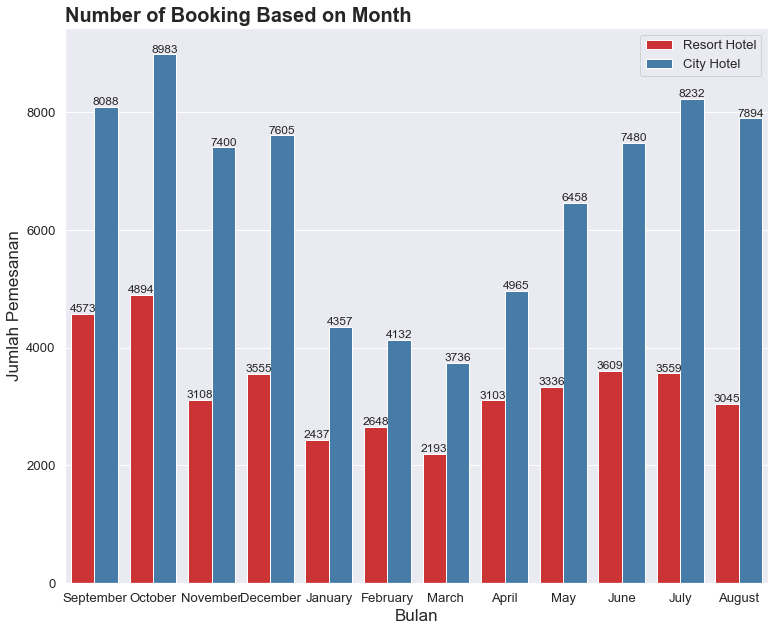

In [207]:
plt.figure(figsize=(11, 9))
ax=sns.countplot(x='arrival_date_month', hue='hotel', data=df)
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

plt.title('Number of Booking Based on Month', fontweight='bold', fontsize=20, loc='left')
plt.xlabel('Bulan', fontsize=17) 
plt.ylabel('Jumlah Pemesanan', fontsize=17)

plt.legend()
plt.tight_layout()

plt.savefig('Pict/jumlah pemesanan hotel berdasarkan bulan.png', dpi=200) #Savepict

Dari visualisasi di atas dapat diambil insight, bahwa jumlah pemesanan `City Hotel` **SELALU** lebih banyak dibanding `Resort Hotel` di setiap bulannya. Selain itu, dari bulan Maret sampai Oktober, penjualan kamar hotel (baik itu Resort Hotel ataupun City Hotel) selalu **konsisten** naik (hanya terjadi sedikit penurunan pada bulan Agustus). Kemudian, puncak penjualan terjadi pada bulan Oktober sebesar 6498 untuk `City Hotel` dan 4623 untuk `Resort Hotel`.


Perlu dipahami, data ini berdasarkan rentang dari tahun 2017 sampai 2019, untuk mendapatkan hasil yang lebih "fair" kita akan menggunakan rata-rata untuk mendapat hasil yang lebih baik.

In [123]:
df0= df.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df0.columns= ['hotel', 'arrival_month', 'unique_year', 'num_booking']
df0.sort_values(by='unique_year', ascending=False)

,hotel,arrival_month,unique_year,num_booking
23,Resort Hotel,September,3,4573
22,Resort Hotel,October,3,4894
10,City Hotel,October,3,8983
11,City Hotel,September,3,8088
13,Resort Hotel,August,2,3045
21,Resort Hotel,November,2,3108
20,Resort Hotel,May,2,3336
19,Resort Hotel,March,2,2193
18,Resort Hotel,June,2,3609
17,Resort Hotel,July,2,3559


Perhatikan, data bulan September dan Oktober diambil sudah 3 tahun sementara bulan lainnya baru 2 tahun. Ini menjelaskan, bulan September dan Oktober menduduki puncak pemesanan terbanyak. Perlu dilakuka normalisasi agar fair.

In [124]:
# Menjadikan rata-rata
df0['avg_num_booking'] = round(df0['num_booking']/df0['unique_year'])

# Mengurutkan data berdasarkan bulan, serta membuat singkatan Bulan agar lebih mudah divisualisasi
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df0['month'] = df0["arrival_month"].str[:3]
df0['month'] = pd.Categorical(df0['month'], categories=ordered_months, ordered=True) 
df0.drop(columns=['arrival_month'], inplace=True)
df0.head()

,hotel,unique_year,num_booking,avg_num_booking,month
0,City Hotel,2,4965,2482.0,Apr
1,City Hotel,2,7894,3947.0,Aug
2,City Hotel,2,7605,3802.0,Dec
3,City Hotel,2,4132,2066.0,Feb
4,City Hotel,2,4357,2178.0,Jan


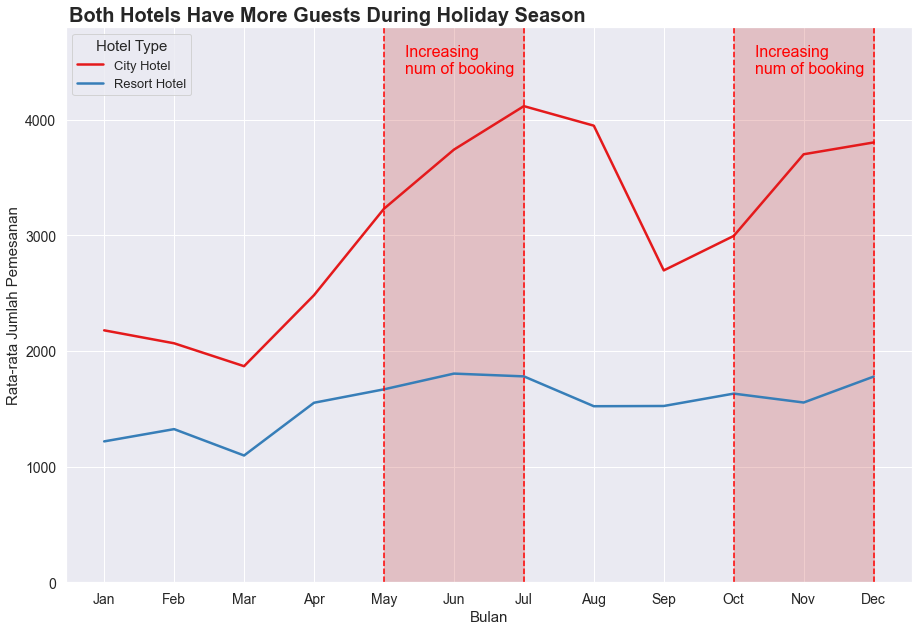

In [210]:
plt.figure(figsize=(13,9))
sns.lineplot(x='month', y='avg_num_booking', hue='hotel', 
             size='hotel', sizes=(2.5, 2.5), data=df0) 

plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xlabel('Bulan', fontsize=15) 
plt.ylabel('Rata-rata Jumlah Pemesanan', fontsize=15) 
plt.ylim(0, 4800)

plt.axvline(4, ls='--', color='red')
plt.axvline(6, ls='--', color='red') 
plt.text(x=4.3, y=4400, s='Increasing \nnum of booking', fontsize=16, color='red')
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) 

plt.axvline(9, ls='--', color='red') 
plt.axvline(11, ls='--', color='red')
plt.text(x=9.3, y=4400, s='Increasing \nnum of booking', fontsize=16, color='red') 
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) 

plt.text(x=-0.5, y=4850, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold')


plt.tight_layout()
plt.savefig('Pict/Rata rata pemesanan hotel berdasarkan bulan.png', dpi=200);

Dengan visualisasi yang telah dinormalisasi seperti ini membuat kita lebih fair dalam menilai. Ternyata tingkat pemesanan hotel tertinggi berada di bulan Mei hingga Juli dan Oktober hingga Desember. Dapat kita asumsikan kedua periode tersebut adalah 'periode emas'. Jika dikaitkan dengan kondisi di Indonesia, bulan-bulan tersebut erat kaitannya dengan musim libur maka pemilik bisnis dapat menyiapkan sejumlah promo-promo menarik sehingga hotelnya bisa menjadi destinasi holiday.

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [170]:
df1= df.copy()
df1['stay_duration'] = df1['stays_in_weekend_nights'] + df1['stays_in_weekdays_nights']
df1.stay_duration.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 49, 57, 34, 43], dtype=int64)

Terlalu besar tingkat kardinalitas, sehingga perlu diturunkan dengan cara pengelompokkan data.

In [196]:
df1['stay_duration_group'] = np.where(df1['stay_duration'] > 21, 21, 
                                       np.where(df1['stay_duration'] > 14, 15, df1['stay_duration']))

df1_agg = df1.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')

df2_pivot = df1_agg.pivot_table(index=['hotel', 'stay_duration_group'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)

df2_pivot.sample(10)

is_canceled,hotel,stay_duration_group,0,1,pct_canceled
12,City Hotel,12,35,30,46.15
9,City Hotel,9,120,93,43.66
3,City Hotel,3,11895,9486,44.37
29,Resort Hotel,12,90,68,43.04
20,Resort Hotel,3,3830,1865,32.75
17,Resort Hotel,0,372,12,3.12
1,City Hotel,1,9169,4103,30.91
32,Resort Hotel,15,90,79,46.75
23,Resort Hotel,6,1206,592,32.93
25,Resort Hotel,8,511,265,34.15


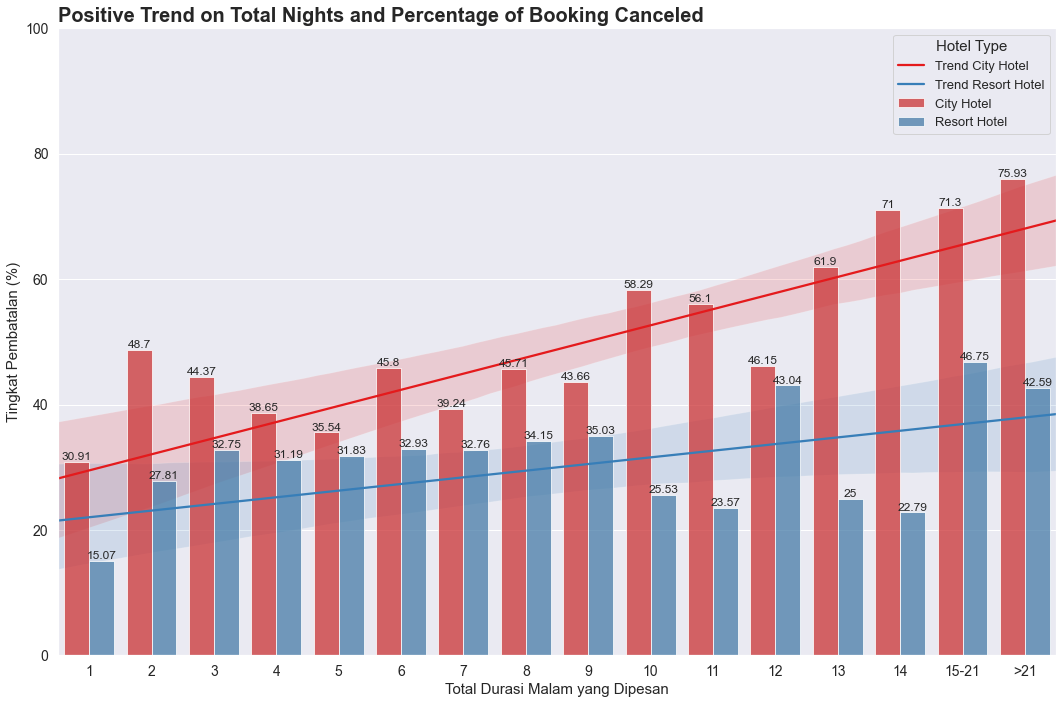

In [209]:
plt.figure(figsize=(15,10))

sns.regplot(x='stay_duration_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], 
            scatter=False, label='Trend City Hotel')
sns.regplot(x='stay_duration_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], 
            scatter=False, label='Trend Resort Hotel')

ax= sns.barplot(x='stay_duration_group', y='pct_canceled', hue='hotel', data=df2_pivot, alpha=0.75)
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) 
plt.xlabel('Total Durasi Malam yang Dipesan', fontsize=15) 
plt.ylabel('Tingkat Pembatalan (%)', fontsize=15) 
plt.ylim(0, 100)
plt.xlim(0.5, 16.5) 

plt.text(x=0.5, y=101, s="Positive Trend on Total Nights and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') 

plt.tight_layout()

plt.savefig('pict/Total stay duration on hotel booking cancelation rates.png', dpi=200);

Berdasarkan visualisasi di atas, terdapat kecenderungan bahwa semakin lama durasi menginap yang direncanakan akan membuat tingkat pembatalannya juga semakin tinggi.

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate!

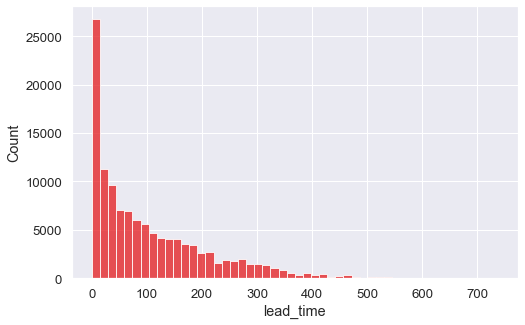

In [201]:
df3= df.copy()
plt.figure(figsize=(8, 5))
sns.histplot(data=df3, x='lead_time', bins=50);

Data terdapat positively skewed dan memiliki cardinality yang tinggi, sehingga perlu dilakukan pengelompokkan.

In [211]:
df3.lead_time.nunique()

479

In [218]:
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time'])
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels)

df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.sample(5)

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
9,City Hotel,270-300,660,1859,2519,73.799127
4,City Hotel,120-150,3070,2543,5613,45.305541
14,Resort Hotel,0-30,13358,1986,15344,12.943170
16,Resort Hotel,60-90,2400,1275,3675,34.693878
27,Resort Hotel,390-420,79,118,197,59.898477


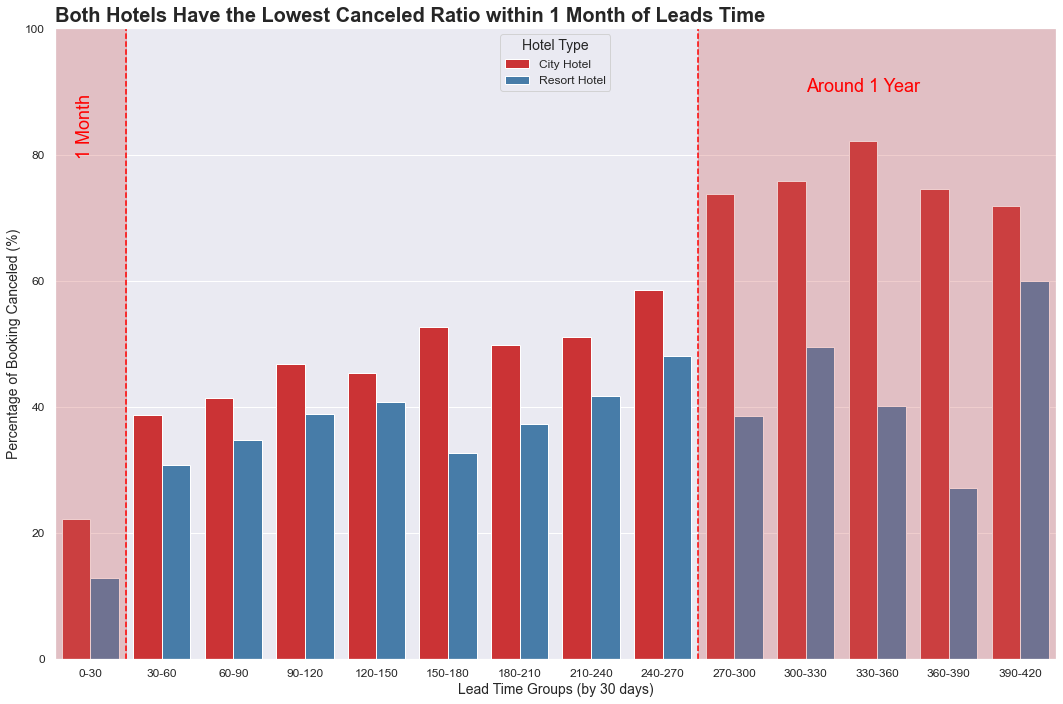

In [222]:
plt.figure(figsize=(15,10)) 
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df3_pivot) 

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) 
plt.ylim(0, 100)
plt.xlim(-0.5,13.5) 

plt.axvline(0.5, ls='--', color='red') 
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) 
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) 

plt.axvline(8.5, ls='--', color='red') 
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') 
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) 

plt.text(x=-0.5, y=101, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') 

plt.tight_layout()
plt.savefig('Pict/Lead time on hotel booking cancelations rate.png', dpi=200); 

Kedua hotel memiliki canceled rate terendah pada `lead_time` kurang dari 1 bulan, di mana semakin tinggi `lead_time` tersebut akan membuat canceled rate meningkat. Bahkan canceled rate bisa mencapai >60% apabila `lead_time` nya lebih dari 9 bulan.

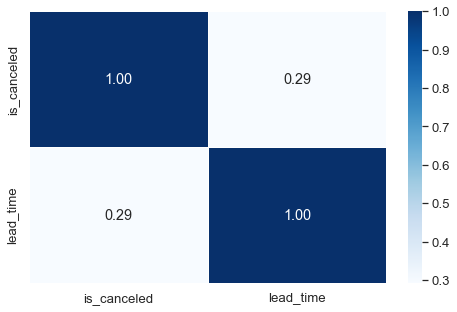

In [224]:
plt.figure(figsize=(8,5))
sns.heatmap(df3[['is_canceled', 'lead_time']].corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

plt.savefig('Pict/heatmap lead_time on cancellation rate.png')

Pernyataan sebelumnya di dukung oleh korelasi antara `is_canceled` dengan `lead_time` yang mencapai 0.29. Di mana korelasi *threshold* untuk korelasi dari rendah ke sedang adalah 0.30.

### Bonus

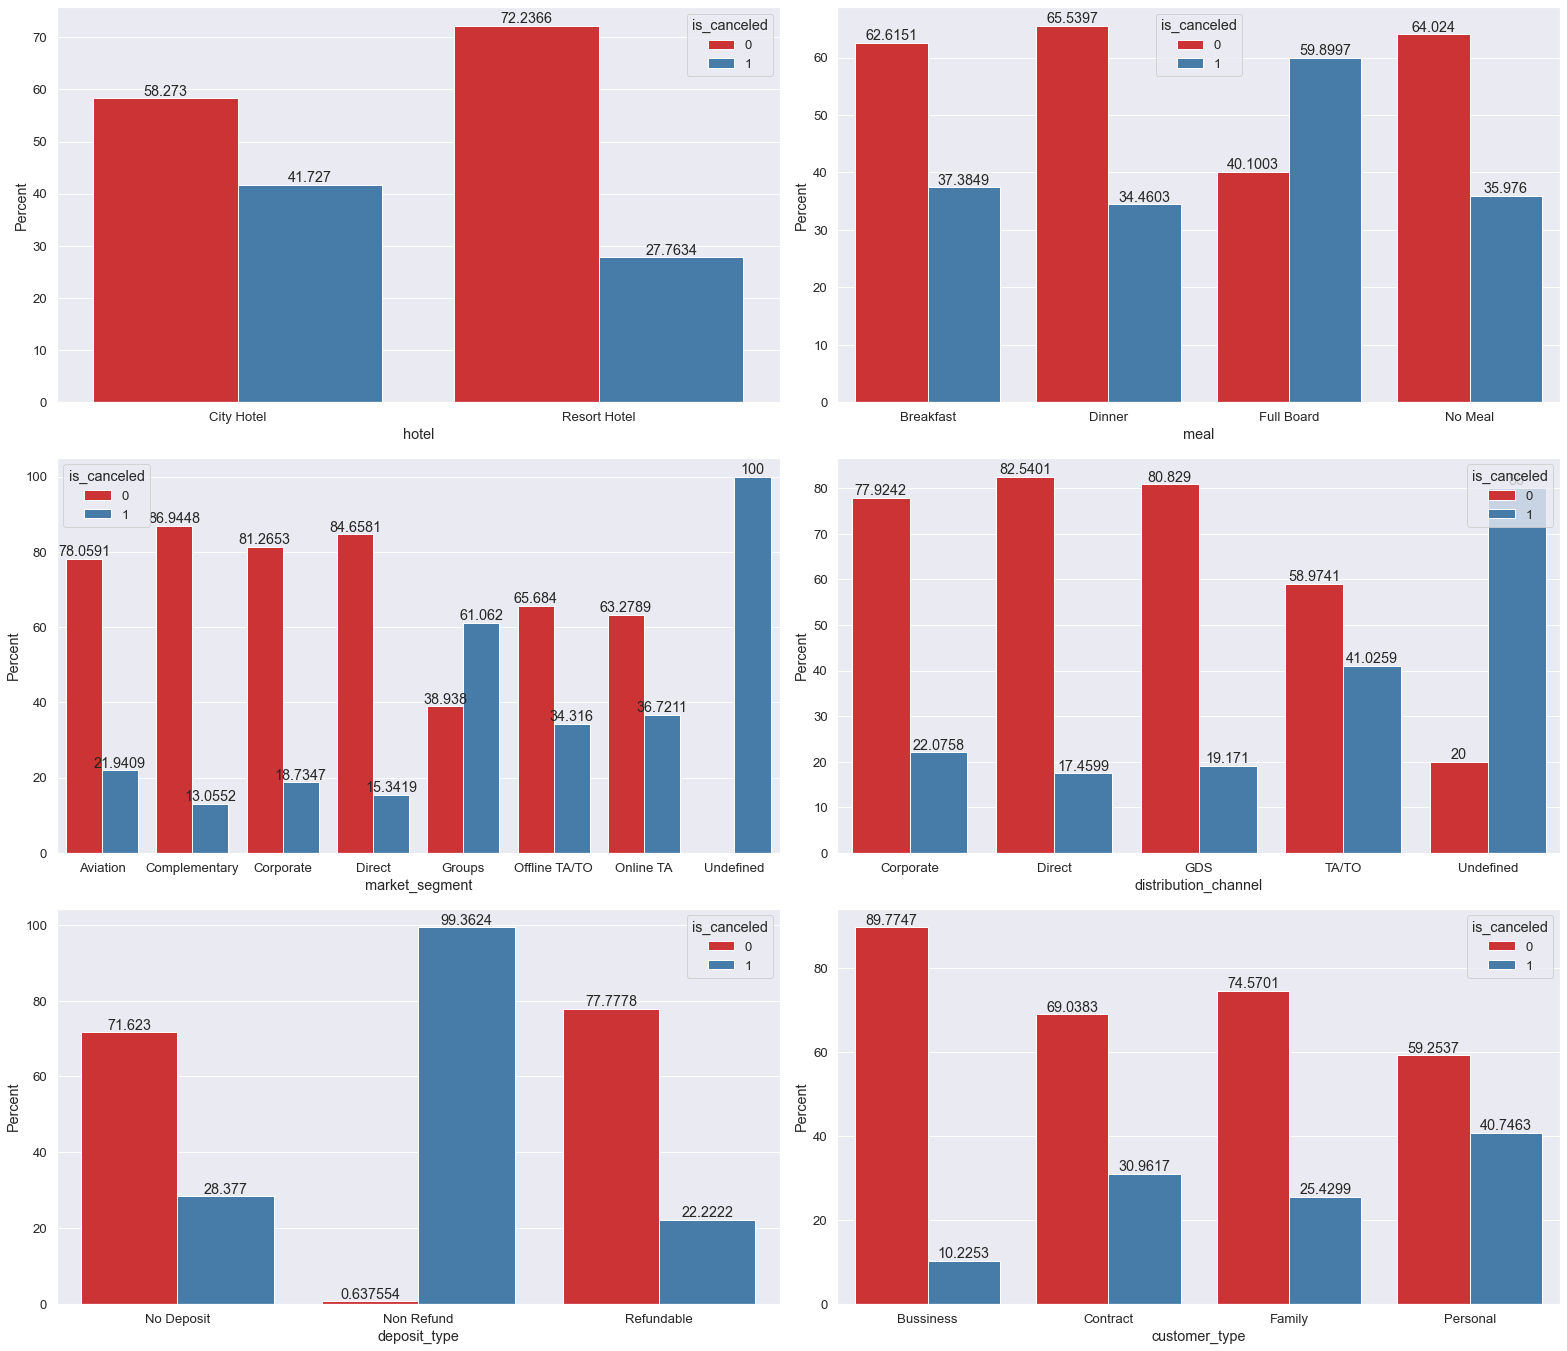

In [283]:
cats= ['hotel', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type']
plt.figure(figsize=(22, 19))
for i,j in enumerate(cats):
        plt.subplot(3,2,i+1)
        normal = df.groupby(j)['is_canceled'].value_counts(normalize=True).multiply(100).rename('Percent').reset_index()
        ax= sns.barplot(data=normal, x=j, y='Percent', hue='is_canceled')
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
plt.tight_layout()
        
plt.savefig('Pict/Bonus.png')

Berikut adalah sebaran cancelation rate di setiap kolom yang bersifat kategorik.